In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [35]:
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
exp_list = pd.read_csv(list_path + "00_bode_phaeo_list.csv", sep=";", decimal=",")
exp_list

,Name,F_max,F_max_source,A_voltage,Amp,Background,Strain,Amp_Ek,Offset_Ek,Label,Time_start,Date,Final protocol,Replicate,Cell_count_mL,Sample_vol_mL
0,20241011_bode_Pt2,0.449400,activation,18.7,28.8,Pt2,WT,0.75,2.50,WT,15,11/10/2024,no,0,1500000.0,2.4
1,20241014_bode_Pt2,0.213300,activation,25.7,34.6,Pt2,WT,1.50,3.13,WT,15,14/10/2024,no,0,906000.0,2.4
2,20241015_bode_KO6,0.359200,activation,28.1,38.9,Pt2,KO6,1.50,3.13,Lhcx1 KO,14,14/10/2024,no,0,1300000.0,2.4
3,20241021_bode_LtpM,0.351500,activation,27.3,30.8,Pt2,LtpM,1.50,3.13,Lhcx1 + +,14,21/10/2024,no,0,1300000.0,2.4
4,20241028_bode_Pt2x1KO6_2.5Ek,0.370112,bode,22.9,47.9,Pt2,KO6,1.50,2.50,Lhcx1 KO,16,25/10/2024,no,0,1360000.0,2.4
5,20241028_bode_LtpM_2.5Ek,0.395237,bode,19.3,37.0,Pt2,LtpM,1.50,2.50,Lhcx1 + +,11,28/10/2024,no,0,1600000.0,2.4
6,20241104_bode_Pt1-1,0.307173,bode,20.2,39.7,Pt1,Pt1-1,1.50,2.50,WT,17,04/11/2024,yes,1,1570000.0,2.4
7,20241104_bode_Pt1-3,0.325595,bode,20.2,39.7,Pt1,Pt1-3,1.50,2.50,VDE KO,14,04/11/2024,yes,1,1880000.0,1.9
8,20241105_bode_Pt1-26,0.326244,bode,20.4,40.5,Pt1,Pt1-26,1.50,2.50,ZEP3 - -,16,05/11/2024,yes,1,1660000.0,2.2
9,20241105_bode_Pt1-27,0.354332,bode,18.7,35.3,Pt1,Pt1-27,1.50,2.50,ZEP3 + +,13,05/11/2024,yes,1,1600000.0,2.4


In [36]:
name = "20241120_bode_Pt1-27"
exp = ec.Experiment(name, "PSI", DataType = ".csv", sep = ';')


In [37]:
t_Fmax = [0.1, 0.12]
for name in exp_list["Name"]:
    exp = ec.Experiment(name, "PSI", DataType = ".csv", sep=';')
    try:
        index = exp.records.index("AL0_before")
        x = exp.clean_times[index]
        y = exp.clean_data[index]
        F_max = np.mean(y[np.where(x>= t_Fmax[0] + 30)[0][0] :np.where(x>= t_Fmax[1] + 30)[0][0]])
        exp_list.loc[exp_list["Name"] == name, "F_max"] = F_max
        exp_list.loc[exp_list["Name"] == name, "F_max_source"] = "bode"
        
    except:
        exp_list.loc[exp_list["Name"] == name, "F_max_source"] = "activation"
        
exp_list.to_csv(list_path + "00_bode_phaeo_list.csv", sep=";", decimal=",", index=False)

exp_list

,Name,F_max,F_max_source,A_voltage,Amp,Background,Strain,Amp_Ek,Offset_Ek,Label,Time_start,Date,Final protocol,Replicate,Cell_count_mL,Sample_vol_mL
0,20241011_bode_Pt2,0.449400,activation,18.7,28.8,Pt2,WT,0.75,2.50,WT,15,11/10/2024,no,0,1500000.0,2.4
1,20241014_bode_Pt2,0.213300,activation,25.7,34.6,Pt2,WT,1.50,3.13,WT,15,14/10/2024,no,0,906000.0,2.4
2,20241015_bode_KO6,0.359200,activation,28.1,38.9,Pt2,KO6,1.50,3.13,Lhcx1 KO,14,14/10/2024,no,0,1300000.0,2.4
3,20241021_bode_LtpM,0.351500,activation,27.3,30.8,Pt2,LtpM,1.50,3.13,Lhcx1 + +,14,21/10/2024,no,0,1300000.0,2.4
4,20241028_bode_Pt2x1KO6_2.5Ek,0.370112,bode,22.9,47.9,Pt2,KO6,1.50,2.50,Lhcx1 KO,16,25/10/2024,no,0,1360000.0,2.4
5,20241028_bode_LtpM_2.5Ek,0.395237,bode,19.3,37.0,Pt2,LtpM,1.50,2.50,Lhcx1 + +,11,28/10/2024,no,0,1600000.0,2.4
6,20241104_bode_Pt1-1,0.307173,bode,20.2,39.7,Pt1,Pt1-1,1.50,2.50,WT,17,04/11/2024,yes,1,1570000.0,2.4
7,20241104_bode_Pt1-3,0.325595,bode,20.2,39.7,Pt1,Pt1-3,1.50,2.50,VDE KO,14,04/11/2024,yes,1,1880000.0,1.9
8,20241105_bode_Pt1-26,0.326244,bode,20.4,40.5,Pt1,Pt1-26,1.50,2.50,ZEP3 - -,16,05/11/2024,yes,1,1660000.0,2.2
9,20241105_bode_Pt1-27,0.354332,bode,18.7,35.3,Pt1,Pt1-27,1.50,2.50,ZEP3 + +,13,05/11/2024,yes,1,1600000.0,2.4


In [38]:
exp_list.to_csv(list_path + "00_bode_phaeo_list.csv", sep=";", decimal=",", index=False)


Text(0, 0.5, 'Fluo (a.u.)')

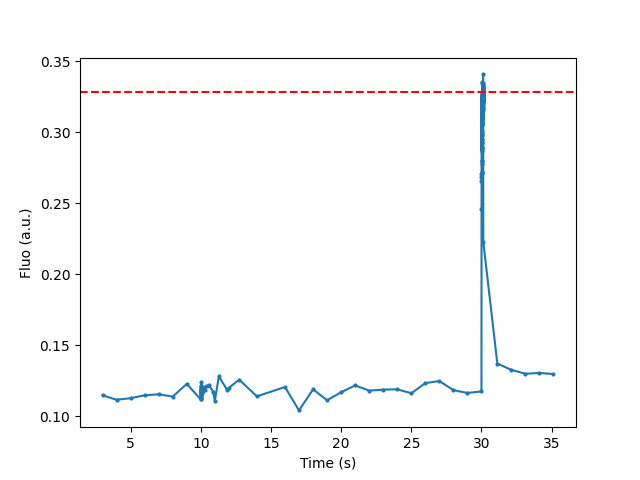

In [22]:
fig, ax = plt.subplots()
index = exp.records.index("AL0_before")
x = exp.clean_times[index]
y = exp.clean_data[index]
ax.plot(x, y, '-o', markersize=2)
t_Fmax = [0.1, 0.12]
F_max = np.mean(y[np.where(x>= t_Fmax[0] + 30)[0][0] :np.where(x>= t_Fmax[1] + 30)[0][0]])
ax.axhline(F_max, color='r', linestyle='--')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluo (a.u.)")